Trabalho Bruno Balkins

 Introdução

Nesse trabalho farei uma análise exploratória dos dados do mundo sobre IDH, assassinatos anuais e a importação de armas, de cada país. Por meio de gráficos observarei a relação que essas informações têm e de que forma uma influência na outra. 
Pergunta a ser respondida através da minha análise: De que forma o IDH de cada país influência na relação entre a Importação de armas e os assassinatos?

In [84]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

Lendo arquivo Excel

In [85]:
idh = pd.read_excel("Indicator_HDI.xlsx")


In [86]:
assa = pd.read_excel("Homicide age.xlsx")


In [87]:
armas = pd.read_excel("Arms imports.xlsx")


Separando colunas do ano a ser analisado

In [88]:
idh_5 = idh.loc[:, ["HDI", 2005]]


In [89]:
assa_5 = assa.loc[:, ["Murder per 100,000, age adjusted", 2005]]



Definindo a coluna dos países como principal

In [90]:
armas_5 = armas.set_index("Arms imports (constant 1990 US$)")


In [91]:
IDH_final = idh_5.set_index("HDI")

In [92]:
assassinatos = assa_5.set_index("Murder per 100,000, age adjusted")

separando

In [93]:
imp_armas = armas_5.loc[:, ["2005"]]


Renomeando as colunas

In [94]:
IDH_final = IDH_final.rename(index=str, columns=lambda column: "IDH_2005")

In [95]:
assassinatos = assassinatos.rename(index=str, columns=lambda column: "assassinatos_2005")


In [96]:
imp_armas = imp_armas.rename(index=str, columns=lambda column: "imp_armas_2005")

Juntando tudo em uma tabela

In [97]:
final = IDH_final.join(assassinatos,how="inner")


In [98]:
final_de_verdade = final.join(imp_armas,how="inner")



Gerando histogramas dos dados para análise individual

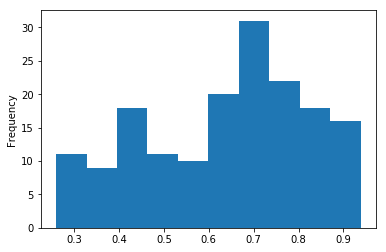

In [99]:
final_de_verdade["IDH_2005"].plot.hist()

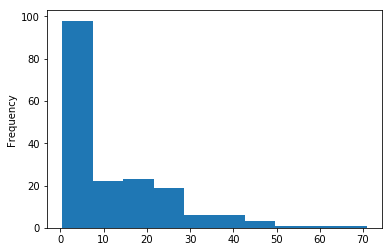

In [100]:
final_de_verdade["assassinatos_2005"].plot.hist()

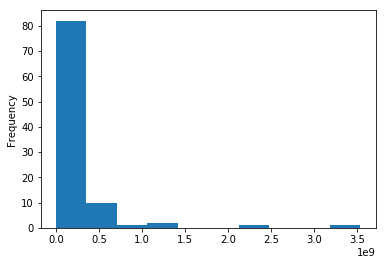

In [101]:
final_de_verdade["imp_armas_2005"].plot.hist()


A partir desses histogramas, com exceção do IDH, os assassinatos por ano e a importação de armas possuem muito menos variedade dos valores. Enquanto os valores de IDH são bem equilibrados com relação à frequência, os outros dois não são, possuem uma frequência muito mais alta de um valor que de outro


Gerando gráficos de dispersão junto com o coeficiente de correlação

-0.6119363741937008

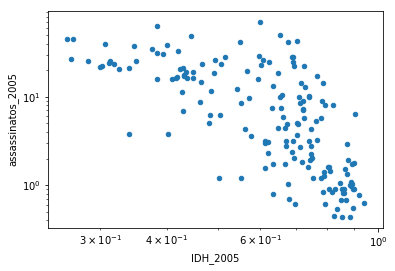

In [102]:
final_de_verdade.plot.scatter(x="IDH_2005", y = "assassinatos_2005", loglog=True)
final_de_verdade["IDH_2005"].corr(final_de_verdade.assassinatos_2005)

0.08385951217330315

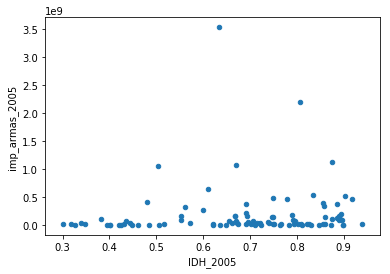

In [103]:
final_de_verdade.plot.scatter(x="IDH_2005", y = "imp_armas_2005")
final_de_verdade["IDH_2005"].corr(final_de_verdade.imp_armas_2005)

-0.1714835618536882

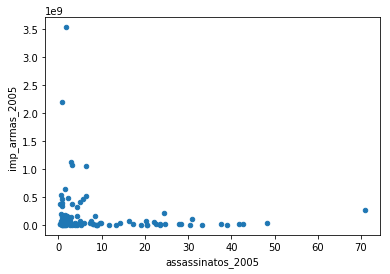

In [104]:
final_de_verdade.plot.scatter(x="assassinatos_2005", y = "imp_armas_2005")
final_de_verdade["assassinatos_2005"].corr(final_de_verdade.imp_armas_2005)

Podemos observar com esses gráficos que apenas a relação do IDH com os assassinatos ficou “interessante”, já que nos mostrou que países com maiores IDH tendem a ter menos assassinatos. Já na relação entre o IDH e a importação de armas, não há uma relação tão visível quanto à anterior. E também no último gráfico a relação não é muito notável.

Conclusão

Com esse trabalho consegui observar que o IDH dos países influência consideravelmente nos assassinatos anuais ocorridos em 2005. Quanto maior o IDH, menos assassinatos. Já na relação com a importação de armas, observei que o IDH não demonstra ser muito responsável pela maior ou menor importação em muitos países. Em alguns países até dá para fazer uma análise, porém a relação é muito “instável”. Por fim, podemos concluir que os assassinatos são muito influenciados pelo IDH de cada país, porém, os valores da importação de armas não são suficientes para nos convencer de que também está atrelado ao IDH e assassinatos dos países, levando em conta apenas o ano de 2005.